In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('car_price.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df.shape

(11914, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [5]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [6]:
df.columns.str.lower()

Index(['make', 'model', 'year', 'engine fuel type', 'engine hp',
       'engine cylinders', 'transmission type', 'driven_wheels',
       'number of doors', 'market category', 'vehicle size', 'vehicle style',
       'highway mpg', 'city mpg', 'popularity', 'msrp'],
      dtype='object')

### Features

In [7]:
features = [
    'Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
    'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP'
]

In [8]:
data = df[features]

In [9]:
data = data.rename(columns={'MSRP':'price'})
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11845 non-null  float64
 4   engine_cylinders   11884 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   price              11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [11]:
data.nunique()

make                   48
model                 915
year                   28
engine_hp             356
engine_cylinders        9
transmission_type       5
vehicle_style          16
highway_mpg            59
city_mpg               69
price                6049
dtype: int64

In [12]:
data.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
price                 0
dtype: int64

In [13]:
data['engine_hp'] = data['engine_hp'].fillna(0)
data['engine_cylinders'] = data['engine_cylinders'].fillna(0)

What is the most frequent observation (mode) for the column transmission_type?

In [14]:
data.describe(include='O')

,make,model,transmission_type,vehicle_style
count,11914,11914,11914,11914
unique,48,915,5,16
top,Chevrolet,Silverado 1500,AUTOMATIC,Sedan
freq,1123,156,8266,3048


In [15]:
data['transmission_type'].value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: transmission_type, dtype: int64

1. Create the correlation matrix for the numerical features of your dataset
2. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset
3. What are the two features that have the biggest correlation in this dataset?

In [16]:
data.corr()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


In [17]:
data.describe()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,247.941749,5.614655,26.637485,19.733255,4.059474e+04
std,7.579740,110.507669,1.800554,8.863001,8.987798,6.010910e+04
min,1990.000000,0.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,22.000000,16.000000,2.100000e+04
50%,2015.000000,225.000000,6.000000,26.000000,18.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,30.000000,22.000000,4.223125e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


In [18]:
data_numeric = data.copy()
data_numeric = data_numeric.drop(['price'], axis=1)
data_numeric.corr()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
year,1.000000,0.338714,-0.040708,0.258240,0.198171
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000


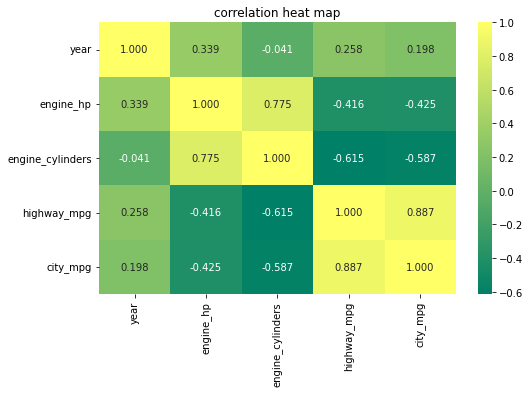

In [19]:
plt.figure(figsize=(8,5))
sns.heatmap(data_numeric.corr(), cmap='summer', annot=True, fmt='.3f')
plt.title('correlation heat map')
plt.show()

In [20]:
data_numeric.corr().unstack().sort_values(ascending=False)

year              year                1.000000
engine_hp         engine_hp           1.000000
highway_mpg       highway_mpg         1.000000
engine_cylinders  engine_cylinders    1.000000
city_mpg          city_mpg            1.000000
                  highway_mpg         0.886829
highway_mpg       city_mpg            0.886829
engine_hp         engine_cylinders    0.774851
engine_cylinders  engine_hp           0.774851
engine_hp         year                0.338714
year              engine_hp           0.338714
                  highway_mpg         0.258240
highway_mpg       year                0.258240
city_mpg          year                0.198171
year              city_mpg            0.198171
                  engine_cylinders   -0.040708
engine_cylinders  year               -0.040708
highway_mpg       engine_hp          -0.415707
engine_hp         highway_mpg        -0.415707
                  city_mpg           -0.424918
city_mpg          engine_hp          -0.424918
             

### Make price binary
1. Now we need to turn the price variable from numeric into binary format
2. Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise

In [21]:
data_class = data.copy()
mean_price = data.price.mean()

In [24]:
 data_class['above_average'] = np.where(data_class['price'] >= mean_price, 1, 0)

In [27]:
data_class=data_class.drop('price', axis=1)

#### Split the data
1. Split your data in train/val/test sets, with 60%/20%/20% distribution
2. Use Scikit-Learn for that (the train_test_split function) and set the seed to 42
3. Make sure that the target value (price) is not in your dataframe

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
seed = 42

In [30]:
df_full_train, df_test = train_test_split(data_class, test_size=0.20, random_state=seed)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=seed)

In [34]:
assert len(data_class) == (len(df_train) + len(df_val) + len(df_test))

In [37]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [39]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

1. Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only
2. Round the scores to 2 decimals using round(score, 2)
3. Which of these variables has the lowest score?

In [40]:
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error

In [48]:
cat_col = ['make', 'model', 'transmission_type', 'vehicle_style']

In [51]:
def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

In [60]:
df_mi = df_train[cat_col].apply(calculate_mi)
df_mi = round(df_mi.sort_values(ascending=False),2).to_frame(name='MI')
df_mi

,MI
model,0.46
make,0.24
vehicle_style,0.08
transmission_type,0.02


In [61]:
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

assert 'above_average' not in df_train.columns
assert 'above_average' not in df_val.columns
assert 'above_average' not in df_test.columns

1. Now let's train a logistic regression
2. Remember that we have several categorical variables in the dataset. Include them using one-hot encoding
3. Fit the model on the training dataset:
4. To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
5. model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
6. Calculate the accuracy on the validation dataset and rount it to 2 decimal digits

In [62]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge

In [66]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [68]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=seed)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [69]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

In [73]:
accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(f"Accuracy : {accuracy}")

Accuracy : 0.94


1. Let's find the least useful feature using the feature elimination technique
2. Train a model with all these features (using the same parameters as in Q4)
3. Now exclude each feature from this set and train a model without it. Record the accuracy for each model
4. For each feature, calculate the difference between the original accuracy and the accuracy without the feature
5. Which of following feature has the smallest difference?

In [78]:
features = df_train.columns.to_list()

In [106]:
original_score = accuracy
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])
for feature in features:
    subset = features.copy()
    subset.remove(feature)
    
    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records') #convert to dictionary
    X_train = dv.fit_transform(train_dict)
    
    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=seed)
    model.fit(X_train, y_train)
    
    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    
    scores.loc[len(scores)] = [feature, score, original_score-score]

In [105]:
import warnings
warnings.filterwarnings("ignore")

In [107]:
scores

,eliminated_feature,accuracy,difference
0,make,0.944188,-0.004188
1,model,0.924045,0.015955
2,year,0.946286,-0.006286
3,engine_hp,0.922786,0.017214
4,engine_cylinders,0.946286,-0.006286
5,transmission_type,0.947965,-0.007965
6,vehicle_style,0.936215,0.003785
7,highway_mpg,0.942090,-0.002090
8,city_mpg,0.945867,-0.005867


In [113]:
scores[scores.difference == scores.difference.min()]

,eliminated_feature,accuracy,difference
5,transmission_type,0.947965,-0.007965


1. For this question, we'll see how to use a linear regression model from Scikit-Learn.
2. We'll need to use the original column price. Apply the logarithmic transformation to this column.
3. Fit the Ridge regression model on the training data:
* To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
* model = Ridge(alpha=a, solver="sag", random_state=42)
* This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
4. Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
*If there are multiple options, select the smallest alpha.*

In [118]:
data.head(2)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650


In [119]:
data['price'] = np.log1p(data.price) #use the logrithmic function to transform the column

In [120]:
df_full_train, df_test = train_test_split(data, test_size=0.20, random_state=seed)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=seed)

In [122]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [125]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

In [126]:
df_train = df_train.drop('price', axis=1)
df_val = df_val.drop('price', axis=1)
df_test = df_test.drop('price', axis=1)

assert 'price' not in df_train.columns
assert 'price' not in df_val.columns
assert 'price' not in df_test.columns

In [134]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [148]:
scores = {}
for alpha in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=alpha, solver="sag", random_state=seed)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = mean_squared_error(y_val, y_pred, squared=False)
    scores[alpha] = round(score, 3)
    print(f"alpha: {alpha}:\t score: {score}")

KeyboardInterrupt: 

In [147]:
scores

{}

In [ ]:
print(f'The smallest `alpha` is {min(scores, key=scores.get)}.')